In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3
import prettytable
prettytable.DEFAULT='DEFAULT'
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Data Collection

## Read the dataset to a datafram from the csv file and display 5 rows

In [2]:
df=pd.read_csv("D://Unified mentor internship projects//CloudWatch_Traffic_Web_Attack.csv")
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


## Understanding the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [5]:
df.shape

(282, 16)

The data set contains 282 rows and 16 columns. The information contained in the columns of the dataset are as follows:- 
* bytes_in - Bytes received by the server
* bytes_out - Bytes sent from the server
* creation_time - Timestamp when the record was created
* end_time - Timestamp of when the connection ended
* src_ip - Source IP address
* src_ip_country_code - Country code of the source IP
* protocol - Protocol used in the connection
* response.code - HTTP response code
* dst_port - Destination port on the server
* dst_ip - Destination IP Address
* rule_names - Name of the rule that identified the traffic as suspicious
* observation_name - Observations associated with the traffic
* source.meta - Meta data related to the source
* source.name - Name of the traffic source
* time - Timestamp of the detected event
* detection_types - Type of detection applied

The columns bytes_in,bytes-out,response.code,dst_port are of integer data type.  The columns creation_time, end_time, src_ip, src_ip_country_code, protocol, dst_ip, rule_names, observation_name, source.meta, source.name, time,detection_types are of object data types.

In [6]:
df.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'protocol', 'response.code', 'dst_port',
       'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types'],
      dtype='object')

In [12]:
df.describe()

,Bytes_in,Bytes_out,Response_Code,Dst_Port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


The average bytes in is 1.19*10^6 and the average bytes out is 8.45*10^4.  The maximum web traffic that server can handle is 2.52*10^7. The maximum bytes the server can send is 1.56*10^6.

# Data Wrangling 

## Changing existing column names to relevant column names, Changing existing data types of columns to relevant types

In [3]:
df.rename(columns={'bytes_in':'Bytes_in','bytes_out':'Bytes_out','creation_time':'Creation_Time','end_time':'End_Time','src_ip':'Src_IP',
                  'src_ip_country_code':'Src_IP_Country_code','protocol':'Protocol','response.code':'Response_Code','dst_port':'Dst_Port',
                  'dst_ip':'Dst_IP','rule_names':'Rule_Names','observation_name':'Observation_Name','source.meta':'Source_Meta',
                  'source.name':'Source_Name', 'time':'Detected_Event_Time','detection_types':'Detection_Types'},inplace=True)
df.columns

Index(['Bytes_in', 'Bytes_out', 'Creation_Time', 'End_Time', 'Src_IP',
       'Src_IP_Country_code', 'Protocol', 'Response_Code', 'Dst_Port',
       'Dst_IP', 'Rule_Names', 'Observation_Name', 'Source_Meta',
       'Source_Name', 'Detected_Event_Time', 'Detection_Types'],
      dtype='object')

In [4]:
df['Response_Code']=df['Response_Code'].astype('int')
df['Dst_Port']=df['Dst_Port'].astype('int')
df['Creation_Time']=pd.to_datetime(df['Creation_Time'])
df['End_Time']=pd.to_datetime(df['End_Time'])
df['Detected_Event_Time']=pd.to_datetime(df['Detected_Event_Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Bytes_in             282 non-null    int64              
 1   Bytes_out            282 non-null    int64              
 2   Creation_Time        282 non-null    datetime64[ns, UTC]
 3   End_Time             282 non-null    datetime64[ns, UTC]
 4   Src_IP               282 non-null    object             
 5   Src_IP_Country_code  282 non-null    object             
 6   Protocol             282 non-null    object             
 7   Response_Code        282 non-null    int32              
 8   Dst_Port             282 non-null    int32              
 9   Dst_IP               282 non-null    object             
 10  Rule_Names           282 non-null    object             
 11  Observation_Name     282 non-null    object             
 12  Source_Meta          2

## Checking for null values and duplicate values

In [5]:
df.isnull().sum()

Bytes_in               0
Bytes_out              0
Creation_Time          0
End_Time               0
Src_IP                 0
Src_IP_Country_code    0
Protocol               0
Response_Code          0
Dst_Port               0
Dst_IP                 0
Rule_Names             0
Observation_Name       0
Source_Meta            0
Source_Name            0
Detected_Event_Time    0
Detection_Types        0
dtype: int64

There are no null values in the data set.

In [8]:
df.duplicated().sum()

0

There are no null values and duplicate values in the dataset.

In [28]:
df.head()

,Bytes_in,Bytes_out,Creation_Time,End_Time,Src_IP,Src_IP_Country_code,Protocol,Response_Code,Dst_Port,Dst_IP,...,Source_Name,Detected_Event_Time,Detection_Types,SCT,Detected_Time,Suspicious_End_Time,Duration_of_suspicious_activity,Session_Duration,Average_Packet_Size,anomaly
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,...,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,23:00:00,23:00:00,23:10:00,0 days 00:10:00,600.0,30.986667,0
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,...,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,23:00:00,23:00:00,23:10:00,0 days 00:10:00,600.0,81.830000,0
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,...,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,23:00:00,23:00:00,23:10:00,0 days 00:10:00,600.0,69.956667,0
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,...,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,23:00:00,23:00:00,23:10:00,0 days 00:10:00,600.0,74.706667,0
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,...,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,23:00:00,23:00:00,23:10:00,0 days 00:10:00,600.0,34.030000,0


# Data Analysis

## IQR for anomaly detection

In [6]:
Q1_bytesin=df['Bytes_in'].quantile(0.25)
Q3_bytesin=df['Bytes_in'].quantile(0.75)
IQR_bytesin=Q3_bytesin-Q1_bytesin
max_bytesin=Q3_bytesin + 1.5 * IQR_bytesin
max_bytesin

69010.25

In [7]:
anomalous_bytesin=df[df['Bytes_in'] > max_bytesin]
anomalous_bytesin[['Bytes_in','Creation_Time','End_Time','Src_IP']]

,Bytes_in,Creation_Time,End_Time,Src_IP
7,4767917,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,155.91.45.242
13,73752,2024-04-25 23:10:00+00:00,2024-04-25 23:20:00+00:00,136.226.64.114
15,1968903,2024-04-25 23:10:00+00:00,2024-04-25 23:20:00+00:00,165.225.240.79
18,4804723,2024-04-25 23:10:00+00:00,2024-04-25 23:20:00+00:00,155.91.45.242
36,4190330,2024-04-25 23:30:00+00:00,2024-04-25 23:40:00+00:00,155.91.45.242
43,2015975,2024-04-25 23:40:00+00:00,2024-04-25 23:50:00+00:00,165.225.240.79
47,4758826,2024-04-25 23:40:00+00:00,2024-04-25 23:50:00+00:00,155.91.45.242
54,4791678,2024-04-25 23:50:00+00:00,2024-04-26 00:00:00+00:00,155.91.45.242
64,4793434,2024-04-26 00:00:00+00:00,2024-04-26 00:10:00+00:00,155.91.45.242
70,2019990,2024-04-26 00:10:00+00:00,2024-04-26 00:20:00+00:00,165.225.240.79


In [33]:
print('Number of suspicious traffic',len(anomalous_bytesin))

40


In [8]:
Q1_bytesout=df['Bytes_out'].quantile(0.25)
Q3_bytesout=df['Bytes_out'].quantile(0.75)
IQR_bytesout=Q3_bytesout-Q1_bytesout
max_bytesout=Q3_bytesout + 1.5 * IQR_bytesout
max_bytesout

48985.75

In [9]:
anomalous_bytesout=df[df['Bytes_out'] > max_bytesout]
anomalous_bytesout[['Bytes_out','Creation_Time','End_Time','Src_IP']]

,Bytes_out,Creation_Time,End_Time,Src_IP
7,291520,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,155.91.45.242
18,291088,2024-04-25 23:10:00+00:00,2024-04-25 23:20:00+00:00,155.91.45.242
36,283456,2024-04-25 23:30:00+00:00,2024-04-25 23:40:00+00:00,155.91.45.242
43,79990,2024-04-25 23:40:00+00:00,2024-04-25 23:50:00+00:00,165.225.240.79
47,289956,2024-04-25 23:40:00+00:00,2024-04-25 23:50:00+00:00,155.91.45.242
54,291275,2024-04-25 23:50:00+00:00,2024-04-26 00:00:00+00:00,155.91.45.242
64,292176,2024-04-26 00:00:00+00:00,2024-04-26 00:10:00+00:00,155.91.45.242
70,55292,2024-04-26 00:10:00+00:00,2024-04-26 00:20:00+00:00,165.225.240.79
73,290955,2024-04-26 00:10:00+00:00,2024-04-26 00:20:00+00:00,155.91.45.242
87,64362,2024-04-26 00:30:00+00:00,2024-04-26 00:40:00+00:00,165.225.240.79


In [34]:
print('Number of suspicious traffic',len(anomalous_bytesout))

37


## Analysis using SQL

In [5]:
conn=sqlite3.connect('CyberSecurityDB')

In [6]:
%load_ext sql

In [7]:
cur=conn.cursor()

In [8]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [9]:
%sql sqlite:///CyberSecurityDB

In [10]:
df.to_sql('CloudWatch_Traffic_Web_Attack',conn,if_exists='replace',index=False,method='multi')

282

In [27]:
%sql drop table if exists CloudWatch_Traffic_Web_Attack

 * sqlite:///CyberSecurityDB
Done.


[]

In [23]:
%sql create table CloudWatch_Traffic_Web_Attack as select * from CloudWatch_Traffic_Web_Attack

 * sqlite:///CyberSecurityDB
(sqlite3.OperationalError) no such table: CloudWatch_Traffic_Web_Attack
[SQL: create table CloudWatch_Traffic_Web_Attack as select * from CloudWatch_Traffic_Web_Attack;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [11]:
%sql select * from CloudWatch_Traffic_Web_Attack

 * sqlite:///CyberSecurityDB
Done.


Bytes_in,Bytes_out,Creation_Time,End_Time,Src_IP,Src_IP_Country_code,Protocol,Response_Code,Dst_Port,Dst_IP,Rule_Names,Observation_Name,Source_Meta,Source_Name,Detected_Event_Time,Detection_Types
5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
3906,3488,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
17748,29208,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
4767917,291520,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
10538,15514,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
9656,6380,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.131.1,AT,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule


## Unique IP of origin of suspicious activity

In [13]:
%sql select distinct(Src_IP) from CloudWatch_Traffic_Web_Attack;

 * sqlite:///CyberSecurityDB
Done.


Src_IP
147.161.161.82
165.225.33.6
165.225.212.255
136.226.64.114
165.225.240.79
136.226.77.103
165.225.26.101
155.91.45.242
165.225.209.4
147.161.131.1


## 10 source IP from where maximum times suspicious activities are found

In [14]:
%sql select Src_IP, count(Src_IP) as "Src_IP_Count" from CloudWatch_Traffic_Web_Attack group by Src_IP order by Src_IP_Count desc limit 10  

 * sqlite:///CyberSecurityDB
Done.


Src_IP,Src_IP_Count
165.225.209.4,29
165.225.26.101,28
155.91.45.242,28
136.226.67.101,28
147.161.131.1,21
165.225.240.79,18
136.226.77.103,17
147.161.161.82,16
165.225.212.255,15
94.188.248.74,14


## Total of bytes in for suspicious activity

In [15]:
%sql select sum(Bytes_in) as 'Total Bytes received by the server for suspicious acitivities' from CloudWatch_Traffic_Web_Attack;

 * sqlite:///CyberSecurityDB
Done.


Total Bytes received by the server for suspicious acitivities
338228034


## Total bytes out for suspicious acitivity

In [16]:
%sql select sum(Bytes_out) as 'Total Bytes sent from the server for suspicious activity' from CloudWatch_Traffic_Web_Attack

 * sqlite:///CyberSecurityDB
Done.


Total Bytes sent from the server for suspicious activity
23844310


## Maximum duration of suspicious activity

## What are the unique  Src_IP_Country_code from where suspicious activities are found?

In [10]:
df_countrycode=df['Src_IP_Country_code'].value_counts()
df_countrycode

Src_IP_Country_code
US    113
CA     72
DE     28
AT     21
NL     18
AE     16
IL     14
Name: count, dtype: int64

# Insights from Data and Data Visualisation

## Proportion of suspicious activities from different countries

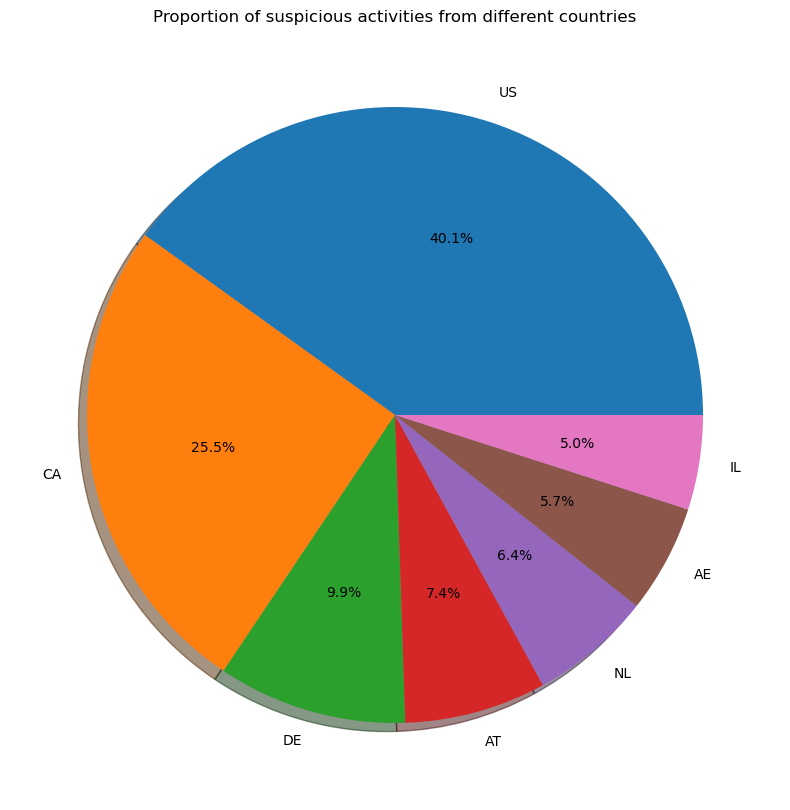

In [31]:
plt.figure(figsize=(10,10))
plt.pie(df_countrycode,labels=df_countrycode.index,autopct='%1.1f%%',shadow=True)
plt.title('Proportion of suspicious activities from different countries')
plt.show()

## What are the maximum bytes in and minimum bytes out for suspicious traffic?

In [32]:
df[(df['Rule_Names']=='Suspicious Web Traffic') & (df['Bytes_in']==max(df['Bytes_in'])) | (df['Bytes_out']==min(df['Bytes_out']))]

,Bytes_in,Bytes_out,Creation_Time,End_Time,Src_IP,Src_IP_Country_code,Protocol,Response_Code,Dst_Port,Dst_IP,...,Source_Name,Detected_Event_Time,Detection_Types,SCT,Detected_Time,Suspicious_End_Time,Duration_of_suspicious_activity,Session_Duration,Average_Packet_Size,anomaly
213,80,44,2024-04-26 08:50:00+00:00,2024-04-26 09:00:00+00:00,65.49.1.72,US,HTTPS,200,443,10.138.69.97,...,prod_webserver,2024-04-26 08:50:00+00:00,waf_rule,08:50:00,08:50:00,09:00:00,0 days 00:10:00,600.0,0.206667,0
279,25207794,1561220,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,...,prod_webserver,2024-04-26 09:50:00+00:00,waf_rule,09:50:00,09:50:00,10:00:00,0 days 00:10:00,600.0,44615.023333,1


## Trend of suspicious traffic 

In [13]:
df['SCT']=df['Creation_Time'].dt.time

In [14]:
df_timetrend=df.groupby('SCT').size()
df_timetrend

SCT
00:00:00     8
00:10:00    10
00:20:00     8
00:30:00     9
00:40:00    10
00:50:00     6
01:00:00    10
01:10:00     9
01:20:00    10
01:30:00    10
01:40:00     9
01:50:00     8
08:00:00     7
08:10:00     7
08:20:00    10
08:30:00     8
08:40:00     7
08:50:00    13
09:00:00    17
09:10:00     9
09:20:00     8
09:30:00     9
09:40:00    11
09:50:00    11
23:00:00    10
23:10:00    11
23:20:00    11
23:30:00     8
23:40:00     9
23:50:00     9
dtype: int64

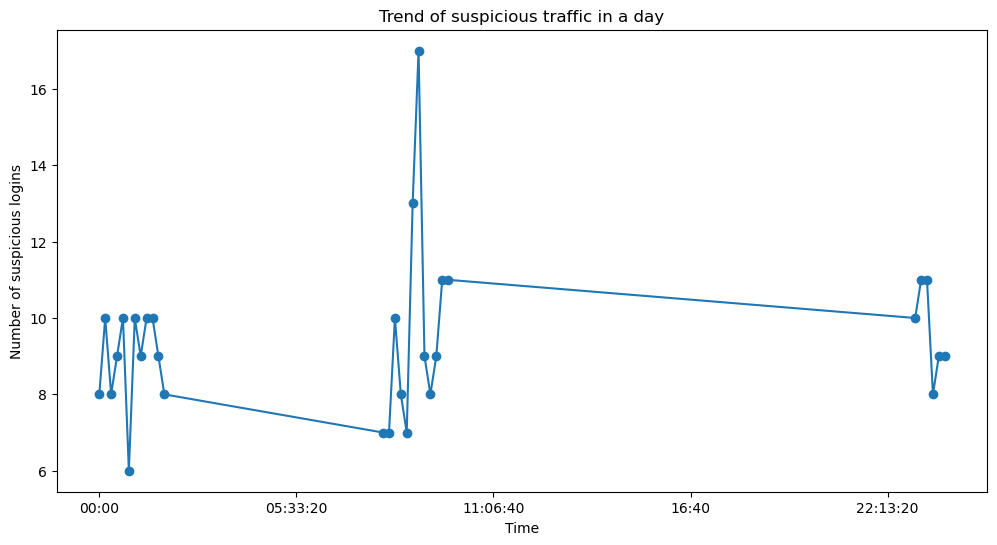

In [15]:
plt.figure(figsize=(12,6))
df_timetrend.plot(kind='line',marker='o')
plt.title('Trend of suspicious traffic in a day')
plt.xlabel('Time')
plt.ylabel('Number of suspicious logins')
plt.show()

The suspicious activity is highest at a peak of 17 suspicious attack logins at 09:00:00 hours. After 09:50:00 hours the suspicious activity was at 23:00:00 hours.

## Duration of suspicious activity

In [16]:
df['Detected_Time']=df['Detected_Event_Time'].dt.time
df['Suspicious_End_Time']=df['End_Time'].dt.time

In [17]:
df['Duration_of_suspicious_activity']=df['End_Time']-df['Detected_Event_Time']
df['Duration_of_suspicious_activity'].head()

0   0 days 00:10:00
1   0 days 00:10:00
2   0 days 00:10:00
3   0 days 00:10:00
4   0 days 00:10:00
Name: Duration_of_suspicious_activity, dtype: timedelta64[ns]

In [18]:
df['Duration_of_suspicious_activity'].unique()

<TimedeltaArray>
['0 days 00:10:00']
Length: 1, dtype: timedelta64[ns]

All suspicious activities lasted for 10 minutes.

## Distribution of bytes in

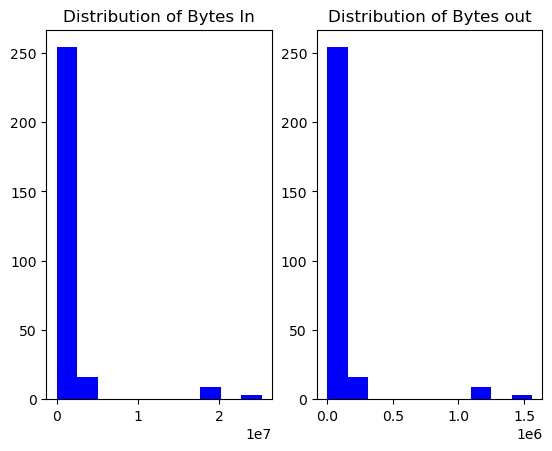

In [19]:
fig,ax=plt.subplots(1,2)

ax[0].hist(df['Bytes_in'],bins=10,color='blue',label='Bytes In')
ax[0].set_title('Distribution of Bytes In')


ax[1].hist(df['Bytes_out'],bins=10,color='blue',label='Bytes Out')
ax[1].set_title('Distribution of Bytes out')

plt.show()

There are a few suspicious activities in which hundred thousands and millions of bytes transferred.

## Feature Engineering

In [20]:
df['Session_Duration']=(df['End_Time']-df['Creation_Time']).dt.total_seconds()
df['Average_Packet_Size']=(df['Bytes_in']+df['Bytes_out'])/df['Session_Duration']

In [21]:
df[['Session_Duration','Average_Packet_Size']].head()

,Session_Duration,Average_Packet_Size
0,600.0,30.986667
1,600.0,81.830000
2,600.0,69.956667
3,600.0,74.706667
4,600.0,34.030000


In [49]:
df.columns

Index(['Bytes_in', 'Bytes_out', 'Creation_Time', 'End_Time', 'Src_IP',
       'Src_IP_Country_code', 'Protocol', 'Response_Code', 'Dst_Port',
       'Dst_IP', 'Rule_Names', 'Observation_Name', 'Source_Meta',
       'Source_Name', 'Detected_Event_Time', 'Detection_Types', 'SCT',
       'Detected_Time', 'Suspicious_End_Time',
       'Duration_of_suspicious_activity', 'Session_Duration',
       'Average_Packet_Size'],
      dtype='object')

# Model Building

In [22]:
X=df[['Bytes_in', 'Bytes_out','Session_Duration','Average_Packet_Size']]


In [23]:
model=IsolationForest(contamination=0.05,random_state=42)

In [24]:
df['anomaly']=model.fit_predict(X)
df['anomaly']=df['anomaly'].map({1:0,-1:1})

In [25]:
df['anomaly'].value_counts()

anomaly
0    267
1     15
Name: count, dtype: int64

## Visualise the results

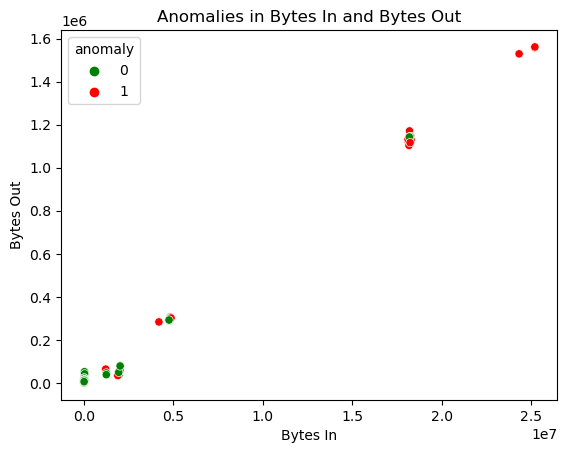

In [26]:
sns.scatterplot(x='Bytes_in',y='Bytes_out',hue='anomaly',data=df,palette=['green','red'],markers=True)
plt.title('Anomalies in Bytes In and Bytes Out')
plt.xlabel('Bytes In')
plt.ylabel('Bytes Out')
plt.show()

# Model Evaluation

In [27]:
true_labels=np.array([0]*267+[1]*15)
print(classification_report(true_labels,df['anomaly']))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       267
           1       0.13      0.13      0.13        15

    accuracy                           0.91       282
   macro avg       0.54      0.54      0.54       282
weighted avg       0.91      0.91      0.91       282

